In [150]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [151]:
df=pd.read_excel(r'CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=True)
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [153]:
df.duplicated().sum()

0

In [154]:
df.isnull().sum()

Sales    0
dtype: int64

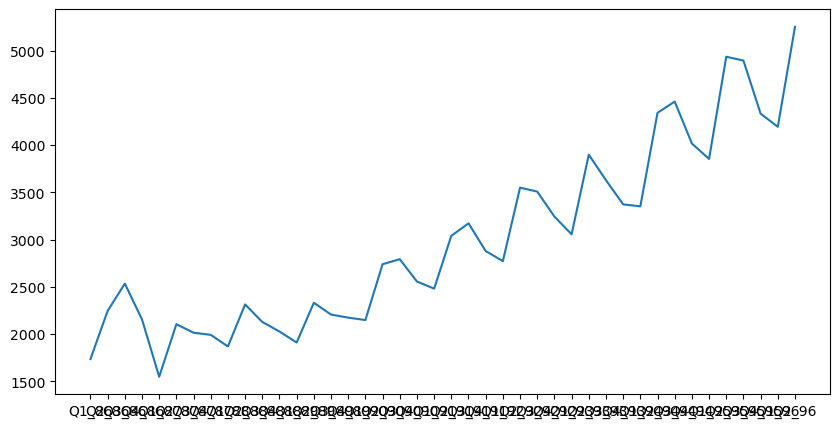

In [155]:
plt.figure(figsize=(10,5))
plt.plot(df)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

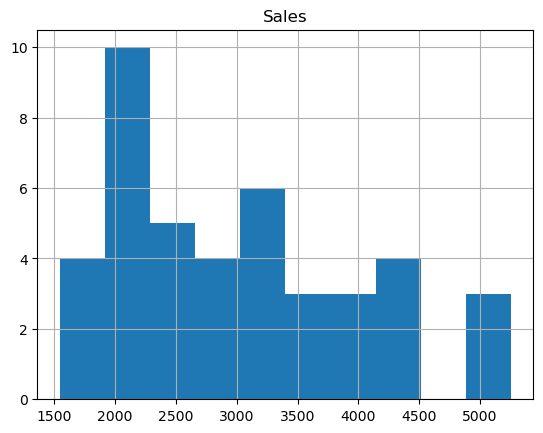

In [156]:
df.hist()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

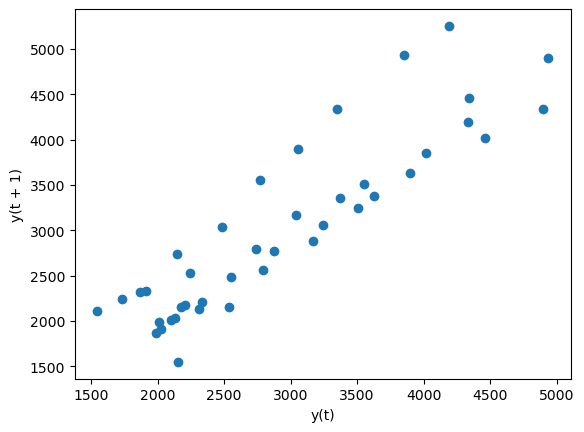

In [157]:
lag_plot(df['Sales'])

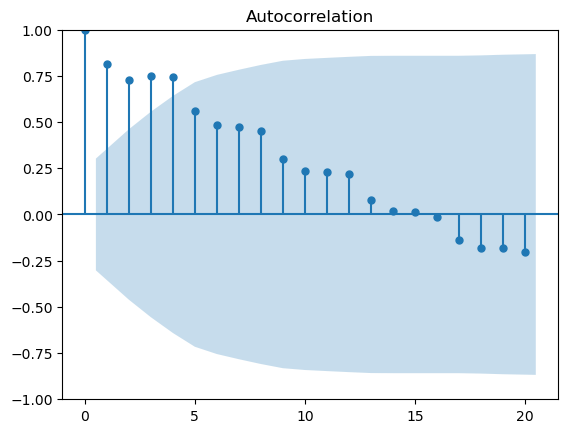

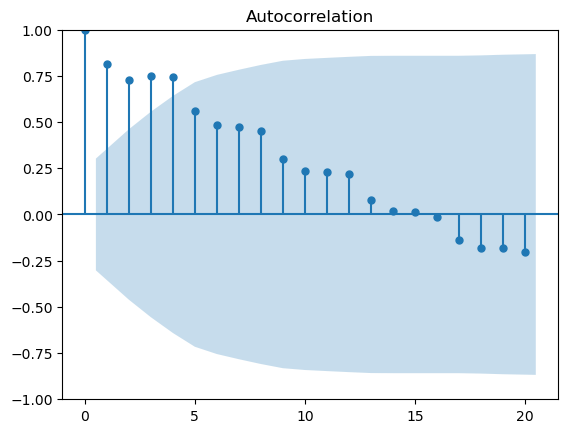

In [158]:
plot_acf(df,lags=20)

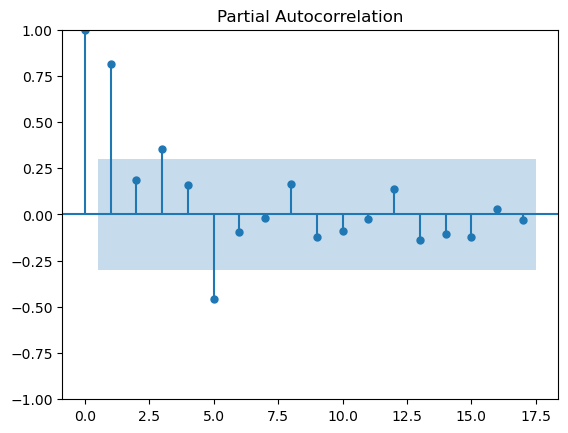

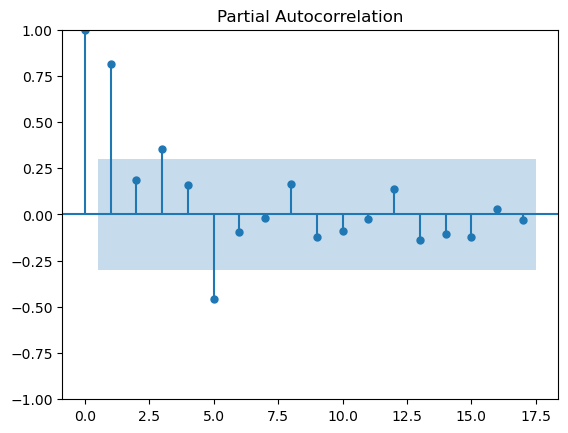

In [159]:
plot_pacf(df)

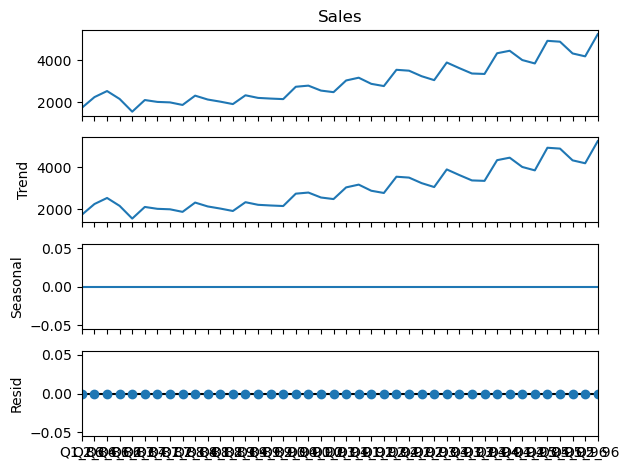

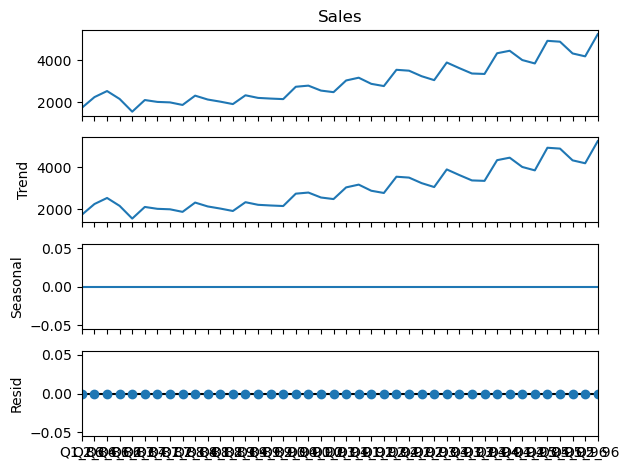

In [160]:
result=seasonal_decompose(df['Sales'],model='additive', extrapolate_trend='freq', period=1)
result.plot()

# ARIMA

In [161]:
values=df.values

In [162]:
a=adfuller(values)
a

(1.3094210153268104,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

In [163]:
# since p value (0.99) is greater than 0.025. The time series is non stationary.

In [164]:
#Detrending
data = pd.DataFrame(df["Sales"].diff())
detrended = data.dropna()
b = adfuller(detrended.values)[1]
b

0.11510080332405515

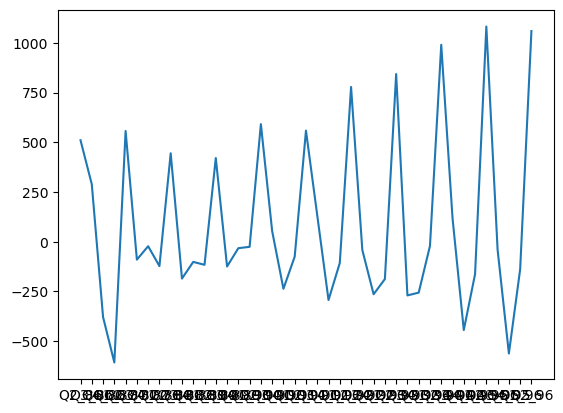

In [165]:
plt.plot(detrended)

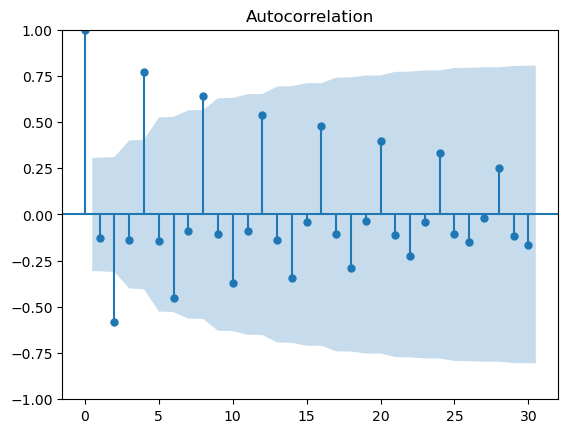

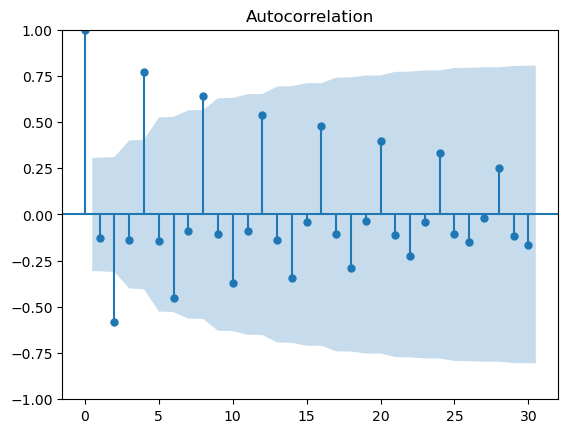

In [166]:
plot_acf(detrended.values,lags=30)

In [167]:
X=df.values
X

array([[1734.82699966],
       [2244.96099854],
       [2533.80499268],
       [2154.96299744],
       [1547.81899643],
       [2104.41199493],
       [2014.36299896],
       [1991.74699783],
       [1869.04999924],
       [2313.63199615],
       [2128.31999969],
       [2026.82899857],
       [1910.60399628],
       [2331.16499329],
       [2206.54999542],
       [2173.96799469],
       [2148.27799988],
       [2739.30799866],
       [2792.7539978 ],
       [2556.00999451],
       [2480.97399902],
       [3039.522995  ],
       [3172.11599731],
       [2879.00099945],
       [2772.        ],
       [3550.        ],
       [3508.        ],
       [3243.85999298],
       [3056.        ],
       [3899.        ],
       [3629.        ],
       [3373.        ],
       [3352.        ],
       [4342.        ],
       [4461.        ],
       [4017.        ],
       [3854.        ],
       [4936.        ],
       [4895.        ],
       [4333.        ],
       [4194.        ],
       [5253.   

In [168]:
X=X.astype('float32')

In [169]:
model=ARIMA(X,order=(2, 1, 2))
m=model.fit()

In [170]:
forecast=m.forecast(steps=8)
forecast

array([5148.72371563, 4348.40820149, 4458.97846954, 5238.82212567,
       5122.33448313, 4362.53521694, 4484.57738786, 5224.7534383 ])

In [171]:
dataframe=pd.DataFrame(forecast,columns=['Forecasted values'])
dataframe

,Forecasted values
0,5148.723716
1,4348.408201
2,4458.978470
3,5238.822126
4,5122.334483
5,4362.535217
6,4484.577388
7,5224.753438


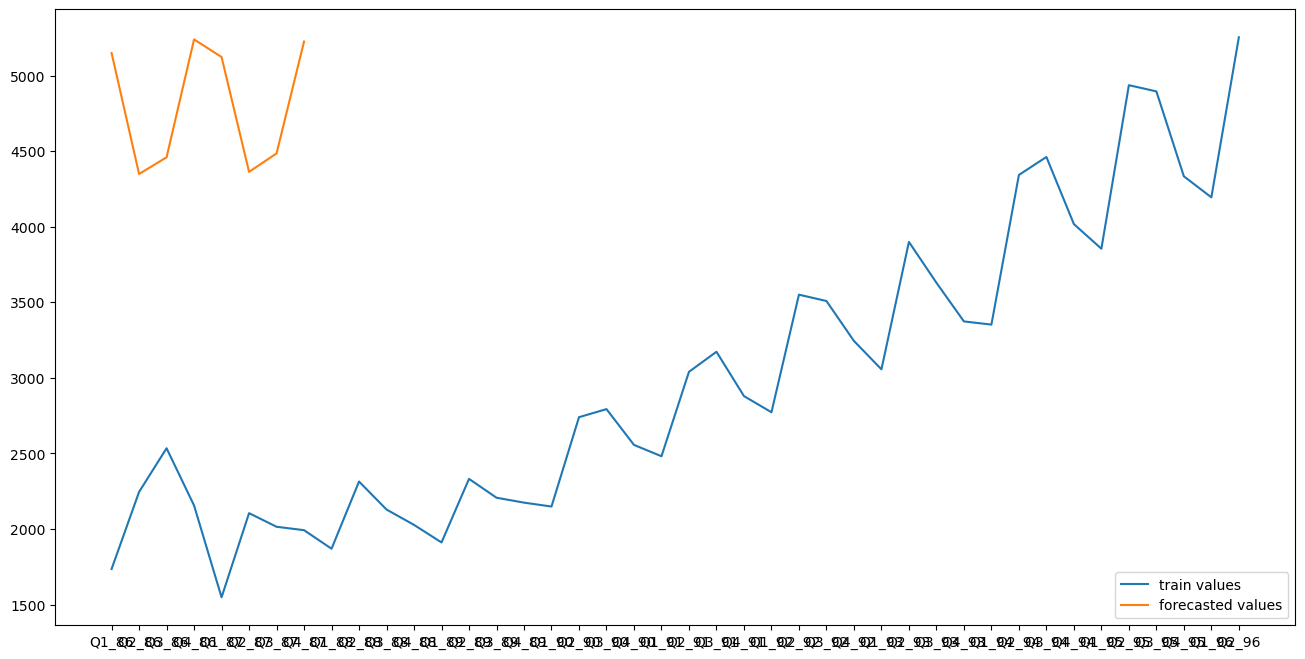

In [172]:
plt.figure(figsize=(16,8))
plt.plot(df["Sales"], label='train values')
plt.plot(dataframe["Forecasted values"], label="forecasted values")
plt.legend(loc='best')
plt.show()

In [173]:
df.reset_index(inplace=True)

In [174]:
df1=df.copy()
df1.head(9)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999


In [175]:
initial_val="NaN"
df1['Quart']=initial_val[0:2]
df1['Year']=0
for i in range(0,df1.shape[0]):
    temp=df1['Quarter'][i]
    df1['Quart'][i]=temp[0:2]
    df1['Year'][i]=temp[3:5]

C:\Users\my computer\AppData\Local\Temp\ipykernel_16064\330654350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quart'][i]=temp[0:2]
C:\Users\my computer\AppData\Local\Temp\ipykernel_16064\330654350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'][i]=temp[3:5]


In [176]:
df1.head()

,Quarter,Sales,Quart,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [177]:
df1['QART']=df1['Quart'].map({'Q1':'01-04','Q2':'01-07','Q3':'01-10','Q4':'01-01'})
for i in range(0,df1.shape[0]):
    date=df1['Quart'][i]
    df1['Year'][i]="19"+df1['Year'][i]
    df1['Date']=df1['QART']+"-"+(df1['Year'])

C:\Users\my computer\AppData\Local\Temp\ipykernel_16064\3521836146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'][i]="19"+df1['Year'][i]


In [178]:
df1.drop('QART',axis=1,inplace=True)
df1.head()

,Quarter,Sales,Quart,Year,Date
0,Q1_86,1734.827000,Q1,1986,01-04-1986
1,Q2_86,2244.960999,Q2,1986,01-07-1986
2,Q3_86,2533.804993,Q3,1986,01-10-1986
3,Q4_86,2154.962997,Q4,1986,01-01-1986
4,Q1_87,1547.818996,Q1,1987,01-04-1987


In [179]:
df1['t']=np.arange(1,43)
df1['t_squared']=df1['t']**2
df1['Sales_log']=np.log(df1['Sales'])
df1['Sales_sqrt']=np.sqrt(df1['Sales'])
df1.head()

,Quarter,Sales,Quart,Year,Date,t,t_squared,Sales_log,Sales_sqrt
0,Q1_86,1734.827000,Q1,1986,01-04-1986,1,1,7.458663,41.651254
1,Q2_86,2244.960999,Q2,1986,01-07-1986,2,4,7.716443,47.381019
2,Q3_86,2533.804993,Q3,1986,01-10-1986,3,9,7.837477,50.336915
3,Q4_86,2154.962997,Q4,1986,01-01-1986,4,16,7.675529,46.421579
4,Q1_87,1547.818996,Q1,1987,01-04-1987,5,25,7.344602,39.342331


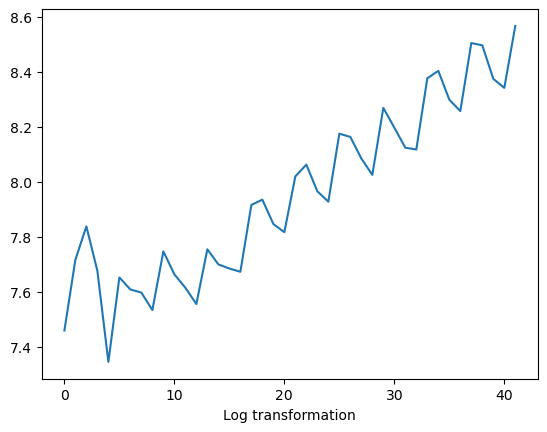

In [180]:
plt.plot(df1['Sales_log'])
plt.xlabel("Log transformation")
plt.show()

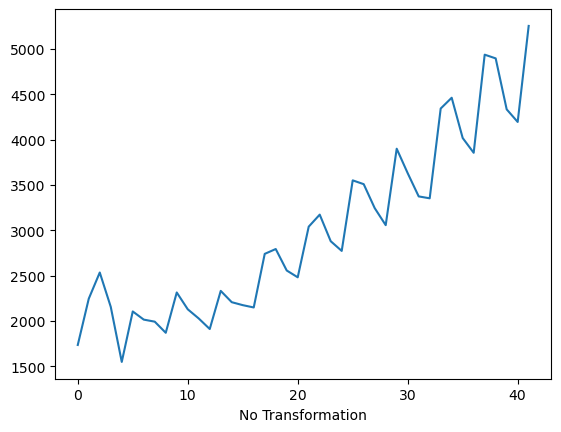

In [181]:
plt.plot(df1['Sales'])
plt.xlabel("No Transformation")
plt.show()

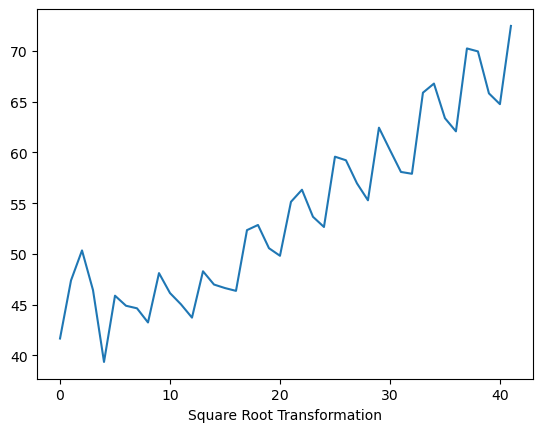

In [182]:
plt.plot(df1['Sales_sqrt'])
plt.xlabel("Square Root Transformation")
plt.show()

In [183]:
df1=pd.get_dummies(df1,columns=['Quart'])
df1

,Quarter,Sales,Year,Date,t,t_squared,Sales_log,Sales_sqrt,Quart_Q1,Quart_Q2,Quart_Q3,Quart_Q4
0,Q1_86,1734.827000,1986,01-04-1986,1,1,7.458663,41.651254,1,0,0,0
1,Q2_86,2244.960999,1986,01-07-1986,2,4,7.716443,47.381019,0,1,0,0
2,Q3_86,2533.804993,1986,01-10-1986,3,9,7.837477,50.336915,0,0,1,0
3,Q4_86,2154.962997,1986,01-01-1986,4,16,7.675529,46.421579,0,0,0,1
4,Q1_87,1547.818996,1987,01-04-1987,5,25,7.344602,39.342331,1,0,0,0
5,Q2_87,2104.411995,1987,01-07-1987,6,36,7.651791,45.873871,0,1,0,0
6,Q3_87,2014.362999,1987,01-10-1987,7,49,7.608058,44.881655,0,0,1,0
7,Q4_87,1991.746998,1987,01-01-1987,8,64,7.596767,44.628993,0,0,0,1
8,Q1_88,1869.049999,1988,01-04-1988,9,81,7.533186,43.232511,1,0,0,0
9,Q2_88,2313.631996,1988,01-07-1988,10,100,7.746574,48.100229,0,1,0,0


In [184]:
df1.shape

(42, 12)

In [185]:
x=df1.head(32)
y=df1.tail(10)

In [186]:
x

,Quarter,Sales,Year,Date,t,t_squared,Sales_log,Sales_sqrt,Quart_Q1,Quart_Q2,Quart_Q3,Quart_Q4
0,Q1_86,1734.827000,1986,01-04-1986,1,1,7.458663,41.651254,1,0,0,0
1,Q2_86,2244.960999,1986,01-07-1986,2,4,7.716443,47.381019,0,1,0,0
2,Q3_86,2533.804993,1986,01-10-1986,3,9,7.837477,50.336915,0,0,1,0
3,Q4_86,2154.962997,1986,01-01-1986,4,16,7.675529,46.421579,0,0,0,1
4,Q1_87,1547.818996,1987,01-04-1987,5,25,7.344602,39.342331,1,0,0,0
5,Q2_87,2104.411995,1987,01-07-1987,6,36,7.651791,45.873871,0,1,0,0
6,Q3_87,2014.362999,1987,01-10-1987,7,49,7.608058,44.881655,0,0,1,0
7,Q4_87,1991.746998,1987,01-01-1987,8,64,7.596767,44.628993,0,0,0,1
8,Q1_88,1869.049999,1988,01-04-1988,9,81,7.533186,43.232511,1,0,0,0
9,Q2_88,2313.631996,1988,01-07-1988,10,100,7.746574,48.100229,0,1,0,0


In [187]:
y

,Quarter,Sales,Year,Date,t,t_squared,Sales_log,Sales_sqrt,Quart_Q1,Quart_Q2,Quart_Q3,Quart_Q4
32,Q1_94,3352.0,1994,01-04-1994,33,1089,8.117312,57.896459,1,0,0,0
33,Q2_94,4342.0,1994,01-07-1994,34,1156,8.376090,65.893854,0,1,0,0
34,Q3_94,4461.0,1994,01-10-1994,35,1225,8.403128,66.790718,0,0,1,0
35,Q4_94,4017.0,1994,01-01-1994,36,1296,8.298291,63.379808,0,0,0,1
36,Q1_95,3854.0,1995,01-04-1995,37,1369,8.256867,62.080593,1,0,0,0
37,Q2_95,4936.0,1995,01-07-1995,38,1444,8.504311,70.256672,0,1,0,0
38,Q3_95,4895.0,1995,01-10-1995,39,1521,8.495970,69.964277,0,0,1,0
39,Q4_95,4333.0,1995,01-01-1995,40,1600,8.374015,65.825527,0,0,0,1
40,Q1_96,4194.0,1996,01-04-1996,41,1681,8.341410,64.761099,1,0,0,0
41,Q2_96,5253.0,1996,01-07-1996,42,1764,8.566555,72.477583,0,1,0,0


In [188]:
# Linear Model
model1=smf.ols('Sales~t',data=x).fit()
pred1=model1.predict(y['t'])
rmse1=np.sqrt(mean_squared_error(y['Sales'],pred1))
rmse1

752.9233932767115

In [189]:
# Quadratic Model
model2=smf.ols('Sales~t+t_squared',data=x).fit()
pred2=model2.predict(y[['t','t_squared']])
rmse2=np.sqrt(mean_squared_error(y['Sales'],pred2))
rmse2

457.73573554072897

In [190]:
# Exponential Model
model3=smf.ols('Sales_log~t',data=x).fit()
pred3=model3.predict(y['t'])
rmse3=np.sqrt(mean_squared_error(y['Sales_log'],pred3))
rmse3

0.13535411499114683

In [191]:
# Addictive Seasonality
model4=smf.ols('Sales~Quart_Q1+Quart_Q2+Quart_Q3+Quart_Q4',data=x).fit()
pred4=model4.predict(y[['Quart_Q1','Quart_Q2','Quart_Q3','Quart_Q4']])
rmse4=np.sqrt(mean_squared_error(y['Sales'],pred4))
rmse4

1850.4665461858358

In [192]:
# Addictive Quadratic Seasonality 
model5=smf.ols('Sales~t+t_squared+Quart_Q1+Quart_Q2+Quart_Q3+Quart_Q4',data=x).fit()
pred5=model5.predict(y[['t','t_squared','Quart_Q1','Quart_Q2','Quart_Q3','Quart_Q4']])
rmse5=np.sqrt(mean_squared_error(y['Sales'],pred5))
rmse5

277.35107711286446

In [193]:
# Multiplicative Seasonality
model6=smf.ols('Sales_log~Quart_Q1+Quart_Q2+Quart_Q3+Quart_Q4',data=x).fit()
pred6=model6.predict(y[['Quart_Q1','Quart_Q2','Quart_Q3','Quart_Q4']])
rmse6=np.sqrt(mean_squared_error(y['Sales_log'],pred6))
rmse6

0.5629197471132791

In [194]:
# Multiplicative Quadratic Seasonality
model7=smf.ols('Sales_log~t+t_squared+Quart_Q1+Quart_Q2+Quart_Q3+Quart_Q4',data=x).fit()
pred7=model7.predict(y[['t','t_squared','Quart_Q1','Quart_Q2','Quart_Q3','Quart_Q4']])
rmse7=np.sqrt(mean_squared_error(y['Sales_log'],pred7))
rmse7

0.15450929745698339

In [195]:
data1=pd.DataFrame(data={'Models':['Linear Model','Quadratic Model','Exponential Model','Addictive Seasonality','Addictive Quadratic Seasonality','Multiplicative Seasonality','Multiplicative Quadratic Seasonality'],'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]})

In [196]:
data1

,Models,RMSE
0,Linear Model,752.923393
1,Quadratic Model,457.735736
2,Exponential Model,0.135354
3,Addictive Seasonality,1850.466546
4,Addictive Quadratic Seasonality,277.351077
5,Multiplicative Seasonality,0.562920
6,Multiplicative Quadratic Seasonality,0.154509
